### Part A

In [11]:
# All the essential codes needs to be written for a thorough testing of multiple predictors
# After the above process selected predictors will be used for arriving at result for part B.

In [93]:
#Importing all essential libraries and respective Data Files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn import tree 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('CE802_P2_Data.csv')
test_df = pd.read_csv('CE802_P2_Test.csv')

In [17]:
df_P2_df_P2_test_data = test_df.iloc[:,:-1].copy()
df_P2_df_P2_test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,17.856,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.42,-11.57
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,12.171,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.22,-10.29
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,55.230,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.02,NaN
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,59.256,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.50,-9.29
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,35.091,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.22,-8.97


In [18]:
df_P2_data = data.copy()
df_P2_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,NaN,True


In [19]:
df_P2_df_P2_test_data.shape

(1000, 21)

In [20]:
df_P2_data.shape

(1000, 22)

In [21]:
y = df_P2_data["Class"]  
df_P2_data = df_P2_data.drop(columns="Class")
df_P2_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,24.44400,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,NaN
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,50.59500,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,NaN
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,38.82552,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,NaN
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,39.59310,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,NaN
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,39.95820,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,NaN


In [22]:
df_P2_data.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21'],
      dtype='object')

In [23]:
cols_df_scale = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12'
                 ,'F13','F14','F15','F16','F17','F18','F19','F20','F21']

cols_df_test_scale = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12'
                 ,'F13','F14','F15','F16','F17','F18','F19','F20','F21']

In [24]:
#feature scaling

min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(df_P2_data)
df_P2_data = pd.DataFrame(x_scaled_minmax, columns = cols_df_scale)

df_P2_data.head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0.934132,0.0,0.998990,0.792886,0.399778,0.0,0.244183,0.337558,1.0,0.461598,...,0.409060,0.878296,0.193257,0.095183,0.016438,0.359206,0.549025,0.494844,0.544598,NaN
1,0.933729,1.0,0.904349,0.994993,0.318994,0.0,0.283698,0.339071,1.0,0.566131,...,0.658974,0.983019,0.043521,0.150980,0.136940,0.367723,0.562891,0.692089,0.897758,NaN
2,0.933899,0.0,0.621863,0.699140,0.528566,0.0,0.016673,0.354534,0.0,0.509842,...,0.546498,0.573628,0.020169,0.358431,0.052823,0.417287,0.503683,0.129009,0.519972,NaN


In [25]:
x_scaled_minmax_test = min_max_scaler.fit_transform(df_P2_df_P2_test_data)
df_P2_df_P2_test_data = pd.DataFrame(x_scaled_minmax_test, columns = cols_df_test_scale)

df_P2_df_P2_test_data.head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0.574086,0.0,0.999710,0.970401,0.512753,0.0,0.152550,0.473462,0.0,0.724435,...,0.315422,0.977871,0.109386,0.334785,0.135942,0.355029,0.401911,0.204957,0.380771,0.213605
1,0.475997,0.0,0.726846,0.892623,0.415574,1.0,0.290619,0.446105,1.0,0.561481,...,0.258343,0.998568,0.000527,0.358300,0.058115,0.366925,0.410054,0.374639,0.381191,0.387755
2,0.477653,0.0,0.792084,0.768972,0.517478,1.0,0.093015,0.460487,1.0,0.699632,...,0.690663,0.852301,0.058525,0.268198,0.201833,0.348434,0.396003,0.178980,0.405404,NaN


In [26]:
df_P2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
dtypes: float64(21)
memory usage: 164.2 KB


In [27]:
df_P2_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,0.933322,0.529000,0.916765,0.787146,0.436517,0.507000,0.218620,0.369616,0.481000,0.552012,...,0.549648,0.875883,0.205540,0.220434,0.204339,0.361246,0.492149,0.221307,0.530005,0.504623
std,0.029887,0.499408,0.115493,0.201070,0.082258,0.500201,0.173477,0.084118,0.499889,0.082841,...,0.139382,0.125776,0.197979,0.201248,0.192715,0.060723,0.076304,0.204498,0.069095,0.156057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.933841,0.000000,0.890078,0.698862,0.403619,0.000000,0.081095,0.337163,0.000000,0.543051,...,0.461489,0.841642,0.056862,0.065835,0.060075,0.337712,0.487980,0.061854,0.511899,0.395742
50%,0.934183,1.000000,0.959849,0.850439,0.420327,1.000000,0.180815,0.352863,0.000000,0.572919,...,0.550747,0.913428,0.143730,0.158303,0.147765,0.347549,0.508812,0.155301,0.531485,0.511747
75%,0.934517,1.000000,0.992492,0.936684,0.447440,1.000000,0.325925,0.378822,1.000000,0.586961,...,0.637608,0.960996,0.286469,0.312398,0.289684,0.365358,0.519047,0.331060,0.548312,0.612335
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df_P2_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21    500
dtype: int64

In [29]:
df_P2_df_P2_test_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21    500
dtype: int64

In [30]:
df_P2_data['F21'].value_counts()

0.480176    8
0.565345    6
0.534508    5
0.531571    5
0.468429    4
           ..
0.530103    1
0.226138    1
0.719530    1
0.417034    1
0.000000    1
Name: F21, Length: 294, dtype: int64

In [31]:
df_P2_data['F21'] = df_P2_data['F21'].replace(to_replace = np.nan, value = df_P2_data['F21'].median()) 
df_P2_df_P2_test_data['F21'] = df_P2_df_P2_test_data['F21'].replace(to_replace = np.nan, value = df_P2_df_P2_test_data['F21'].median()) 

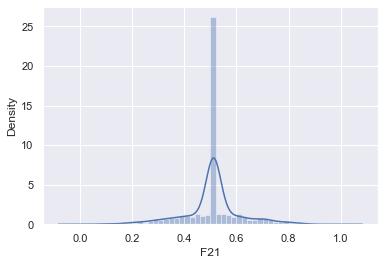

In [32]:
sns.distplot(df_P2_data['F21'])
plt.show()

In [33]:
df_P2_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.933322,0.529000,0.916765,0.787146,0.436517,0.507000,0.218620,0.369616,0.481000,0.552012,...,0.549648,0.875883,0.205540,0.220434,0.204339,0.361246,0.492149,0.221307,0.530005,0.508185
std,0.029887,0.499408,0.115493,0.201070,0.082258,0.500201,0.173477,0.084118,0.499889,0.082841,...,0.139382,0.125776,0.197979,0.201248,0.192715,0.060723,0.076304,0.204498,0.069095,0.110351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.933841,0.000000,0.890078,0.698862,0.403619,0.000000,0.081095,0.337163,0.000000,0.543051,...,0.461489,0.841642,0.056862,0.065835,0.060075,0.337712,0.487980,0.061854,0.511899,0.511564
50%,0.934183,1.000000,0.959849,0.850439,0.420327,1.000000,0.180815,0.352863,0.000000,0.572919,...,0.550747,0.913428,0.143730,0.158303,0.147765,0.347549,0.508812,0.155301,0.531485,0.511747
75%,0.934517,1.000000,0.992492,0.936684,0.447440,1.000000,0.325925,0.378822,1.000000,0.586961,...,0.637608,0.960996,0.286469,0.312398,0.289684,0.365358,0.519047,0.331060,0.548312,0.511931
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
df_P2_test_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,-28683.968173,1.23000,-5.025042,-7.015668,1762.419003,0.511000,4.312748,16778.730888,0.515000,-9992.713822,...,37.834215,-13.707351,6.112560,15.792469,4.052514,9971.468359,-3680.212814,3.221459,-5071.031116,-10.196380
std,332.442187,0.50025,1.452505,2.708759,722.266558,0.500129,0.592295,1999.794429,0.500025,1545.736345,...,15.642763,9.896270,1.784523,2.603198,2.594508,892.962805,704.027232,2.662473,1004.061063,1.053944
min,-33135.290000,0.73000,-16.824000,-17.841000,-3589.650000,0.000000,3.541166,4945.980000,0.000000,-23271.820000,...,-13.560000,-71.930000,4.226840,12.964770,1.264980,5964.240000,-9472.050000,0.333990,-10479.220000,-13.140000
25%,-28719.265000,0.73000,-5.320700,-8.040000,1492.045000,0.000000,3.831125,16010.135000,0.000000,-10117.770000,...,27.205500,-17.362500,4.773850,13.801125,2.104350,9587.720000,-3778.140000,1.171650,-5329.870000,-10.920000
50%,-28699.728500,1.23000,-4.479500,-6.164400,1641.055000,1.000000,4.170500,16390.180000,1.000000,-9653.520000,...,37.598850,-10.515000,5.505100,15.012600,3.224700,9746.710000,-3588.165000,2.354550,-5058.846900,-10.220000
75%,-28681.562500,1.73000,-4.141065,-5.011125,1899.150000,1.000000,4.670250,17045.480000,1.000000,-9397.622000,...,48.631500,-6.655000,6.998500,17.097000,5.434500,10079.840000,-3476.647500,4.414500,-4772.820000,-9.457500
max,-23862.290000,1.73000,-4.040005,-4.205910,7435.350000,1.000000,6.741000,29619.980000,1.000000,-4257.820000,...,86.040000,-3.785041,13.330000,26.616000,14.637000,16320.240000,4909.950000,13.488000,1918.780000,-5.790000


In [35]:
df_P2_data.nunique()

F1     985
F2       2
F3     973
F4     946
F5     974
F6       2
F7     943
F8     973
F9       2
F10    976
F11    948
F12    982
F13    947
F14    951
F15    955
F16    936
F17    983
F18    979
F19    942
F20    980
F21    295
dtype: int64

In [36]:
df_P2_df_P2_test_data.nunique()

F1     977
F2       2
F3     977
F4     950
F5     979
F6       2
F7     941
F8     972
F9       2
F10    980
F11    955
F12    974
F13    946
F14    952
F15    930
F16    950
F17    978
F18    977
F19    961
F20    975
F21    278
dtype: int64

In [37]:
df_P2_data.duplicated().sum()

0

In [38]:
df_P2_df_P2_test_data.duplicated().sum()

0

<AxesSubplot:>

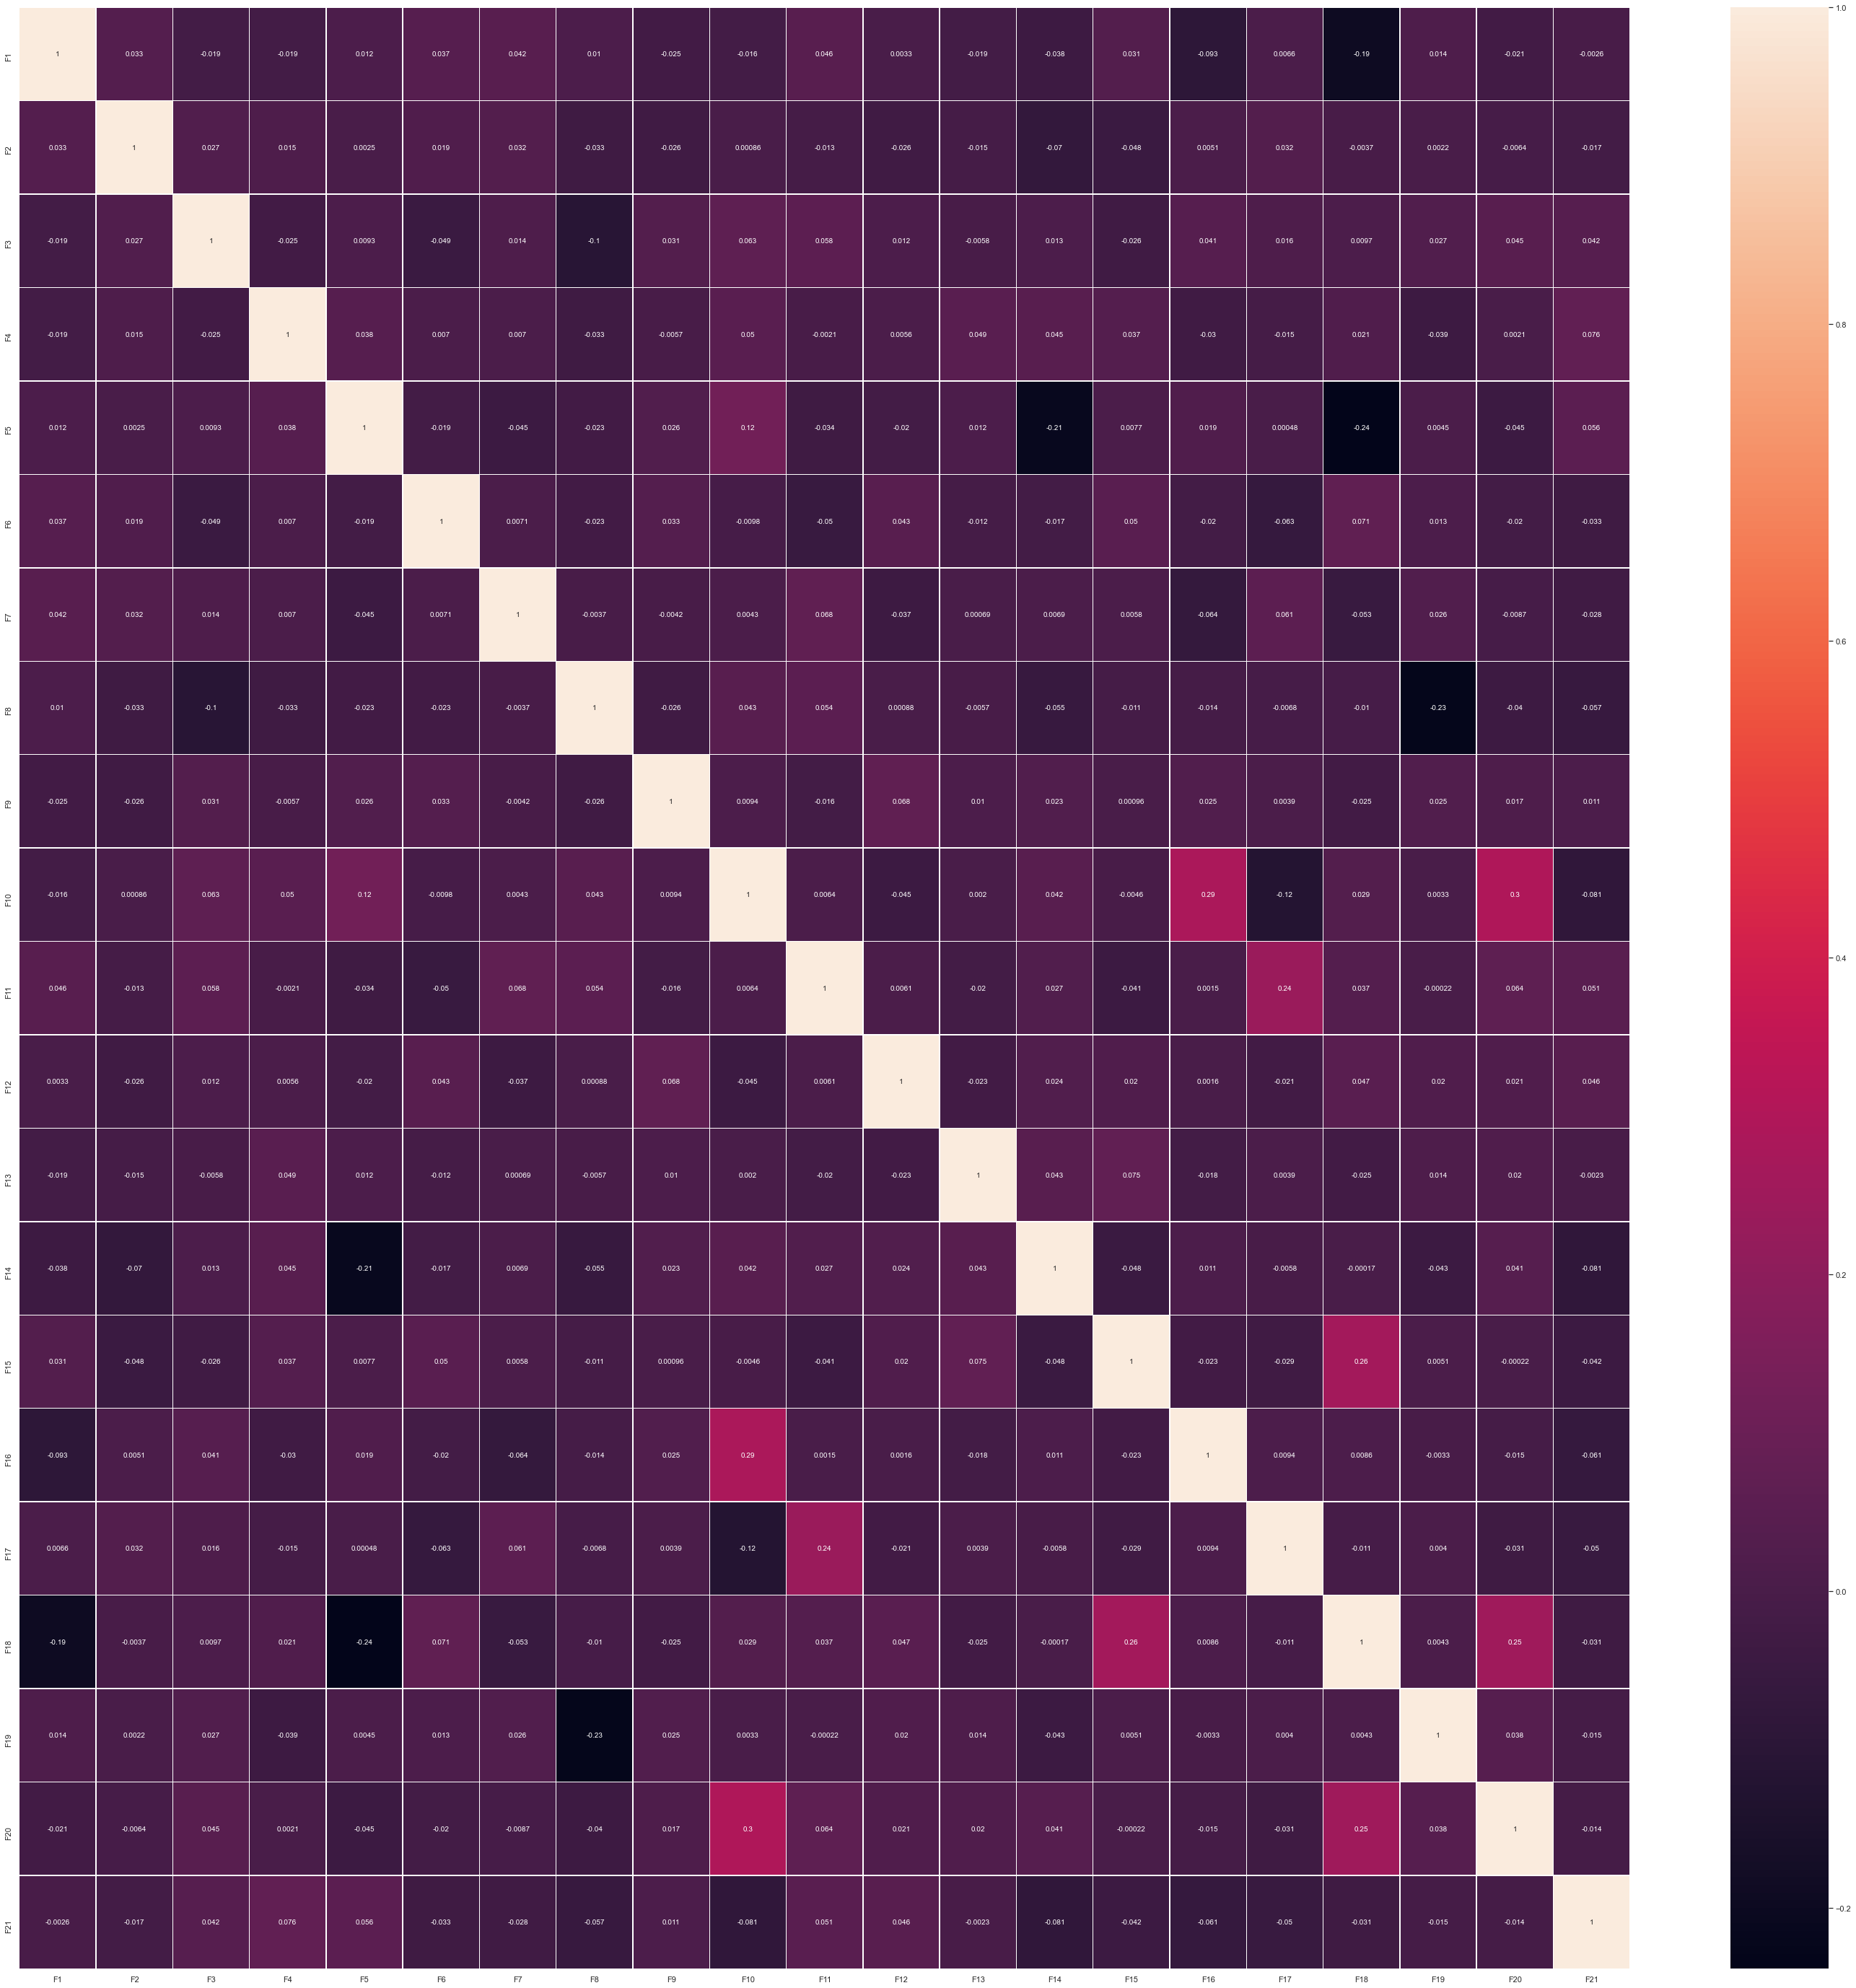

In [39]:
fig, ax = plt.subplots(figsize=(50,50))         # 'Sample figures size in inches'
correlation = df_P2_data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, linewidths=.5, annot=True, ax=ax)

<AxesSubplot:>

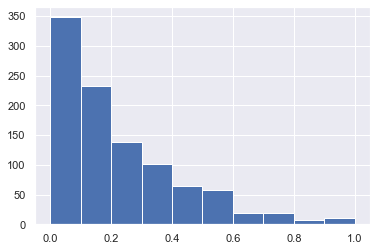

In [42]:
df_P2_data["F19"].hist()

<AxesSubplot:>

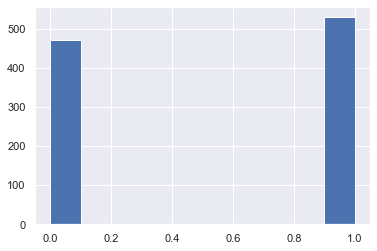

In [43]:
df_P2_data["F2"].hist()

<AxesSubplot:>

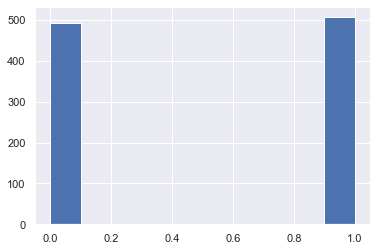

In [44]:
df_P2_data["F6"].hist()

In [45]:
df_P2_data[["F19", "F6", "F2"]].duplicated().sum()

15

In [46]:
drop_features = ["F19", "F6"]

In [47]:
df_P2_data = df_P2_data.drop(columns= drop_features)
df_P2_df_P2_test_data = df_P2_df_P2_test_data.drop(columns= drop_features)

In [48]:
df_P2_data.head(2)

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F20,F21
0,0.934132,0.0,0.998990,0.792886,0.399778,0.244183,0.337558,1.0,0.461598,0.897610,0.409060,0.878296,0.193257,0.095183,0.016438,0.359206,0.549025,0.544598,0.511747
1,0.933729,1.0,0.904349,0.994993,0.318994,0.283698,0.339071,1.0,0.566131,0.866678,0.658974,0.983019,0.043521,0.150980,0.136940,0.367723,0.562891,0.897758,0.511747


* Conditioning the Outliers*

<AxesSubplot:xlabel='F7'>

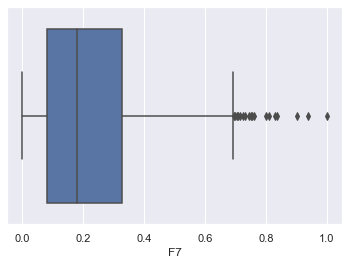

In [49]:
sns.boxplot(df_P2_data["F7"]) 

In [50]:
Q1 = df_P2_data.quantile(0.25)
Q3 = df_P2_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

F1     0.000675
F2     1.000000
F3     0.102413
F4     0.237822
F5     0.043821
F7     0.244831
F8     0.041659
F9     1.000000
F10    0.043910
F11    0.223734
F12    0.176118
F13    0.119354
F14    0.229607
F15    0.246563
F16    0.229609
F17    0.027646
F18    0.031067
F20    0.036413
F21    0.000367
dtype: float64


In [51]:
#print(df_P2_data < (Q1 - 1.5 * IQR)) | (df_P2_data > (Q3 + 1.5 * IQR)) # if True there is a outlier

# On the basis of Quantile conduct flooring and capping

In [52]:
for i in range(1, 22):
    if "F" + str(i) in df_P2_data.columns:
        flooring = df_P2_data["F" + str(i)].quantile(0.10)
        capping = df_P2_data["F" + str(i)].quantile(0.90)
        df_P2_data["F" + str(i)] = np.where(df_P2_data["F" + str(i)] <flooring, flooring,df_P2_data["F" + str(i)])
        df_P2_data["F" + str(i)] = np.where(df_P2_data["F" + str(i)] >capping, capping,df_P2_data["F" + str(i)])
        print(df_P2_data["F" + str(i)].skew())

-0.13713447604354354
-0.11637023378466659
-1.0258748403345181
-0.7454144977831628
0.9609426131534166
0.4323826528889404
1.074873454120195
0.07616923298657761
-1.1384745105797243
-0.7703299229561451
-0.03161092467010505
-0.7983732224537214
0.7145549519901067
0.652476306013797
0.6859189164667475
1.055411898440078
-1.0381892783308322
0.15884061206066877
-0.21185011944779836


In [53]:
for i in range(1, 22):
    if "F" + str(i) in df_P2_df_P2_test_data.columns:
        flooring = df_P2_df_P2_test_data["F" + str(i)].quantile(0.10)
        capping = df_P2_df_P2_test_data["F" + str(i)].quantile(0.90)
        df_P2_df_P2_test_data["F" + str(i)] = np.where(df_P2_df_P2_test_data["F" + str(i)] <flooring, flooring,df_P2_df_P2_test_data["F" + str(i)])
        df_P2_df_P2_test_data["F" + str(i)] = np.where(df_P2_df_P2_test_data["F" + str(i)] >capping, capping,df_P2_df_P2_test_data["F" + str(i)])
        print(df_P2_df_P2_test_data["F" + str(i)].skew())

0.16467214839733163
0.0
-1.06393478340736
-0.7805438111273022
0.7263331827312106
0.38855880961068845
0.8564774343687761
-0.06011723168580054
-0.9628062067391575
-0.724416030898579
-0.020384003990030503
-0.7858867124495571
0.780221411016624
0.6875858807982983
0.6402413203951132
0.9525269120607134
-0.6900924401064408
-0.04226028859978807
0.15381548378335844


In [54]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='F3'>

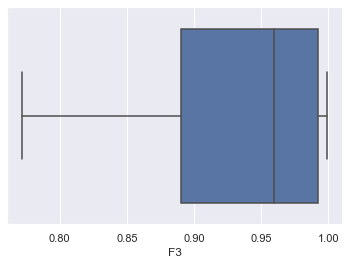

In [55]:
sns.boxplot(df_P2_data["F3"]) 

<AxesSubplot:xlabel='F7'>

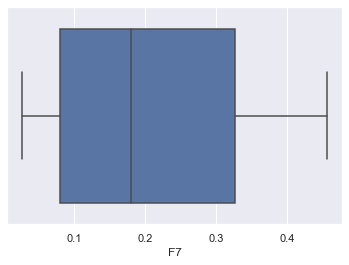

In [56]:
sns.boxplot(df_P2_data["F7"])

<AxesSubplot:xlabel='F13'>

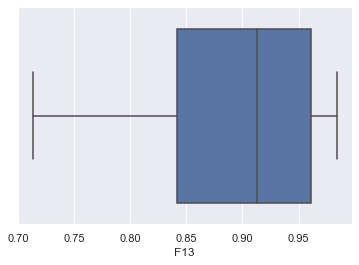

In [57]:
sns.boxplot(df_P2_data["F13"])

*Model Training*

In [58]:

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [60]:
accuracies = {}

In [61]:
from sklearn.model_selection import train_test_split
X = df_P2_data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [62]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_predr_RF=clf.predict(X_test)

In [63]:
accuracy =metrics.accuracy_score(y_test, y_predr_RF)
print("Accuracy of Random forest Algorithm: {:.2f}%".format(accuracy))

Accuracy of Random forest Algorithm: 0.82%


In [64]:
accuracies['Random Forest'] = accuracy

In [65]:
from sklearn import tree 

In [66]:
dtree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree.fit(X_train,y_train)
y_pred_DT_entropy = dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_DT_entropy))

Accuracy: 0.816


# For Decision Tree test 'k folds'

In [94]:
#datasets to be imported with the help sklearn library
 
#Import decision tree classification model and cross validation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
 
#Extract a holdout set at the very begining
X_train_set, X_holdout, y_train_set, y_holdout = train_test_split(X, y, 
                                stratify = y, random_state = 42, test_size = .20, shuffle=True)
 
#Get input and output datasets values in X and Y variables
X1 = X_train_set
y1 = y_train_set 
 
#Initialize k-fold cross validation configurations
kf = KFold(n_splits=5, random_state=42, shuffle=True)
 
scores1 = []
dt = DecisionTreeClassifier(criterion='gini', max_depth = 2, \
                        min_samples_leaf = 0.10, random_state = 42)
scores = cross_val_score(dt, X, y, cv = 5)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.71  0.765 0.7   0.655 0.73 ]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.712
****************************************************************************************************




In [68]:
#X_train, X_test, y_train, y_test

In [69]:
dtree=tree.DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=0)
dtree.fit(X_train,y_train)
y_pred_DT = dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.816


In [70]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.728

In [71]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.724

In [72]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [73]:
prediction=sgd_clf.predict(X_test)
print('Score:',sgd_clf.score(X_test,y_test))

Score: 0.672


In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#y_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=5)

In [95]:
from sklearn.metrics import confusion_matrix


In [78]:
dtree=tree.DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=0)
dtree.fit(X_train,y_train)
y_pred_DT = dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.816


In [79]:
y_pred_train_DT = dtree.predict(X_train)

In [80]:
from sklearn.metrics import accuracy_score


In [81]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_DT)))

Training-set accuracy score: 0.8307


*Model accuracy check*

In [82]:
print('Training set score: {:.4f}'.format(dtree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dtree.score(X_test, y_test)))

Training set score: 0.8307
Test set score: 0.8160


*Confusion-matrix*

In [83]:

# After printing the confusion-matrix,four portions to be slice it

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_DT)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 94  32]
 [ 14 110]]

True Positives(TP) =  94

True Negatives(TN) =  110

False Positives(FP) =  32

False Negatives(FN) =  14


<AxesSubplot:>

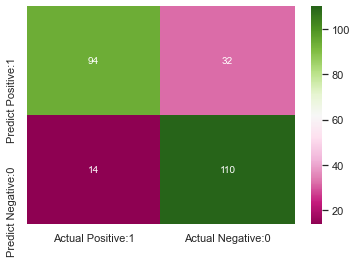

In [84]:
# Use seaborn's heatmaping for Confusion-matrix visualization

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PiYG')

*Classification Description*

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

       False       0.87      0.75      0.80       126
        True       0.77      0.89      0.83       124

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



*Prediction On Test*

In [86]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(df_P2_df_P2_test_data)

In [87]:
y_pred_dt

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,

In [88]:
df_P2_df_P2_test_data

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F20,F21
0,0.485942,0.0,0.998979,0.970401,0.512753,0.152550,0.473462,0.0,0.724435,0.533108,0.315422,0.977871,0.109386,0.334785,0.135942,0.355029,0.401911,0.380771,0.276190
1,0.475997,0.0,0.790129,0.892623,0.443384,0.290619,0.446105,1.0,0.636008,0.533108,0.314048,0.982688,0.025591,0.358300,0.058115,0.366925,0.410054,0.381191,0.387755
2,0.477653,0.0,0.792084,0.768972,0.517478,0.093015,0.460487,1.0,0.699632,0.937203,0.690663,0.852301,0.058525,0.268198,0.201833,0.348434,0.396003,0.405404,0.397279
3,0.481354,0.0,0.995274,0.506047,0.469146,0.105579,0.509070,1.0,0.647060,0.799387,0.715136,0.837626,0.216756,0.057601,0.070836,0.351873,0.367568,0.422223,0.523810
4,0.476067,1.0,0.963533,0.848839,0.502395,0.470598,0.454287,0.0,0.745656,0.740019,0.488464,0.792282,0.127512,0.109751,0.022677,0.353206,0.411064,0.485482,0.529388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.476182,1.0,0.947591,0.896166,0.506159,0.493380,0.451657,1.0,0.733504,0.952364,0.461355,0.964136,0.079375,0.022016,0.469078,0.335656,0.369295,0.470673,0.397279
996,0.481478,1.0,0.992823,0.505959,0.456590,0.439658,0.428021,0.0,0.664111,0.712733,0.468675,0.962595,0.228620,0.098850,0.058497,0.343565,0.423248,0.437172,0.397279
997,0.471485,1.0,0.994348,0.505959,0.456444,0.441846,0.503745,1.0,0.704197,0.967944,0.578735,0.757063,0.159479,0.142077,0.075794,0.457733,0.430517,0.447903,0.397279
998,0.480377,0.0,0.993441,0.920918,0.480862,0.445596,0.428921,0.0,0.719064,0.820842,0.477018,0.948361,0.394057,0.487365,0.401661,0.346443,0.406243,0.383239,0.397279


In [89]:
#df_P2_df_P2_test_data['Class1'] = y_pred_DT
y_pred_DT

array([False, False, False,  True, False,  True,  True, False, False,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False,

In [90]:
df_P2_df_P2_test_data

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F20,F21
0,0.485942,0.0,0.998979,0.970401,0.512753,0.152550,0.473462,0.0,0.724435,0.533108,0.315422,0.977871,0.109386,0.334785,0.135942,0.355029,0.401911,0.380771,0.276190
1,0.475997,0.0,0.790129,0.892623,0.443384,0.290619,0.446105,1.0,0.636008,0.533108,0.314048,0.982688,0.025591,0.358300,0.058115,0.366925,0.410054,0.381191,0.387755
2,0.477653,0.0,0.792084,0.768972,0.517478,0.093015,0.460487,1.0,0.699632,0.937203,0.690663,0.852301,0.058525,0.268198,0.201833,0.348434,0.396003,0.405404,0.397279
3,0.481354,0.0,0.995274,0.506047,0.469146,0.105579,0.509070,1.0,0.647060,0.799387,0.715136,0.837626,0.216756,0.057601,0.070836,0.351873,0.367568,0.422223,0.523810
4,0.476067,1.0,0.963533,0.848839,0.502395,0.470598,0.454287,0.0,0.745656,0.740019,0.488464,0.792282,0.127512,0.109751,0.022677,0.353206,0.411064,0.485482,0.529388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.476182,1.0,0.947591,0.896166,0.506159,0.493380,0.451657,1.0,0.733504,0.952364,0.461355,0.964136,0.079375,0.022016,0.469078,0.335656,0.369295,0.470673,0.397279
996,0.481478,1.0,0.992823,0.505959,0.456590,0.439658,0.428021,0.0,0.664111,0.712733,0.468675,0.962595,0.228620,0.098850,0.058497,0.343565,0.423248,0.437172,0.397279
997,0.471485,1.0,0.994348,0.505959,0.456444,0.441846,0.503745,1.0,0.704197,0.967944,0.578735,0.757063,0.159479,0.142077,0.075794,0.457733,0.430517,0.447903,0.397279
998,0.480377,0.0,0.993441,0.920918,0.480862,0.445596,0.428921,0.0,0.719064,0.820842,0.477018,0.948361,0.394057,0.487365,0.401661,0.346443,0.406243,0.383239,0.397279


Prediction on test data using decision tree using decision tree:
    

In [100]:
final_prediction = dtree.predict(df_P2_df_P2_test_data).tolist()

In [103]:
print(final_prediction)

[True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, False, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

### Part B

In [104]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
df_P2_test_data = test_df.iloc[:,:-1].copy()

predicted = final_prediction

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])